# Aprendizado não supervisionado

A documentação necessário das ferramentas usadas podem ser vistitadas em:

- [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html)


## Importar conjunto de dados

(683, 1024, 3)


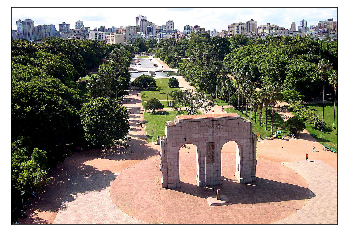

In [28]:
import numpy as np
import  matplotlib.pyplot as plt
from PIL import Image

imagem = Image.open("datasets/parque_farropilha.jpg")

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(imagem)

imagem = np.array(imagem)
print(imagem.shape)


## Normalização dos dados

In [30]:
data = imagem / 255.0
data = data.reshape(683*1024, 3)

print(data.shape)


(699392, 3)


## Visualizar espaço de cores


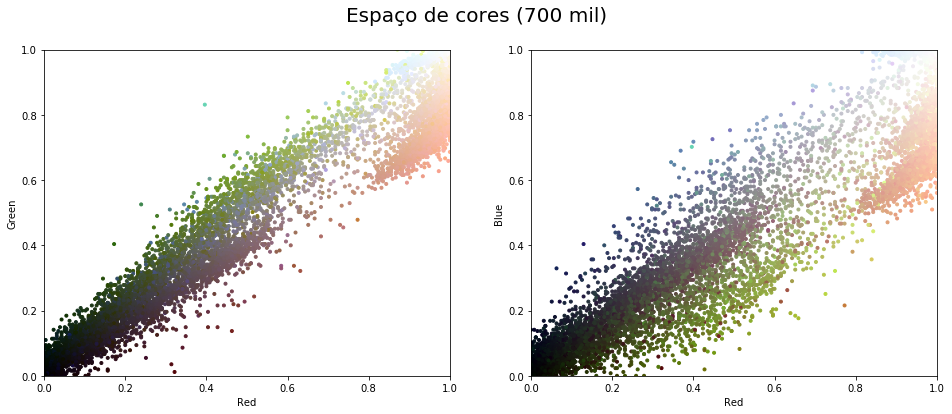

In [66]:
def plot_pixels(data, colors=None, title=''):
    if colors is None:
        colors = data
    
    rng = np.random.RandomState(123)
    i = rng.permutation((data.shape[0]))[:10000]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20)

plot_pixels(data, title='Espaço de cores (700 mil)')



## Treinar algoritmo
### K-Means


In [68]:
from sklearn.cluster import MiniBatchKMeans

clf_kmeans = MiniBatchKMeans(16)
clf_kmeans.fit(data)


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=16, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

## Predição

[[0.97272161 0.98407023 0.98798616]
 [0.97272161 0.98407023 0.98798616]
 [0.97272161 0.98407023 0.98798616]
 ...
 [0.96304283 0.77111933 0.67056528]
 [0.95394175 0.86002065 0.79166005]
 [0.96304283 0.77111933 0.67056528]]


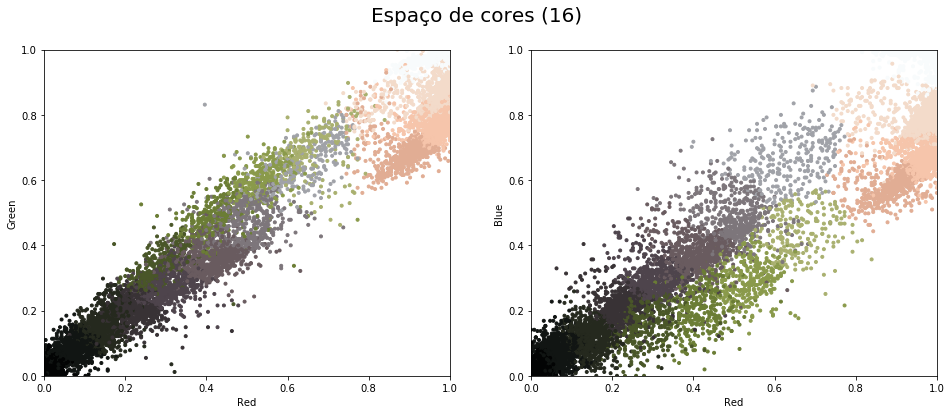

In [69]:
new_colors = clf_kmeans.cluster_centers_[clf_kmeans.predict(data)]

print(new_colors)
plot_pixels(data, colors=new_colors, title='Espaço de cores (16)')


## Avaliar modelos


Text(0.5, 1.0, 'Imagem com 16 cores')

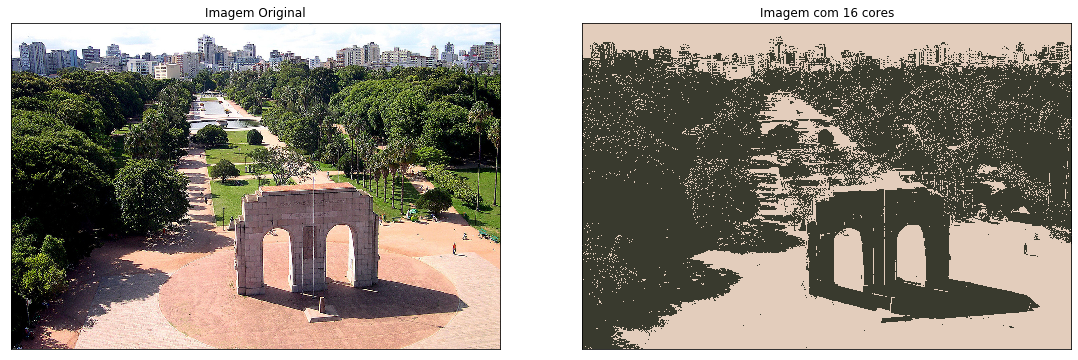

In [60]:
imagem_recolorida = new_colors.reshape(imagem.shape)

fig, ax = plt.subplots(1,2, figsize=(20,6), subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(imagem)
ax[0].set_title('Imagem Original')

ax[1].imshow(imagem_recolorida)
ax[1].set_title('Imagem com 16 cores')